Vibrations of a railroad - Forced vibrations case

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
### Data

## railroad's characteristics
# material
E   = 1#200# * 10**9  #[Pa]
rho = 1#7870         #[kg.m-3]

# stiffness
k   = 0#10**3        #[N/m]

# --------------------------------

# inertia moment
h   = 5*10**-3     #[m]
L   = 100          #[m]

M   = 10**3        #[kg]

I   = 1#.25*M*(h + L**2/h)

# surface
S   = 1#h**2         #[m²]

# --------------------------------

# Applied force
P0 = 10**3         #[N]

# speed
v0 = 5            #[m.s-1]

# --------------------------------

## Mesh
# nb point
Nx = 1000

x  = np.linspace(0, L, Nx)

In [121]:
c   = np.sqrt(E*I/(rho*S))

In [124]:
# nb element :
N = 200

# time at which we want the speed
t = 0.1   #[s]

# Initialisation
A = np.zeros((N))
v = np.zeros((len(x)))

om_n = np.zeros((N))
Om_n = np.zeros((N))

for n in range(1, N):
    g_n  = n * np.pi / L
    
    om_n[n] = c * np.sqrt(g_n**4 + k/(E*I))
    Om_n[n] = g_n * v0
        
    A[n] = (P0/(rho*S)) * np.sqrt(2/L) * 1/(om_n[n]**2 - Om_n[n]**2)
    v   +=  A[n] * np.sin(Om_n[n]*t) * np.sqrt(2/L)*np.sin(g_n*x)

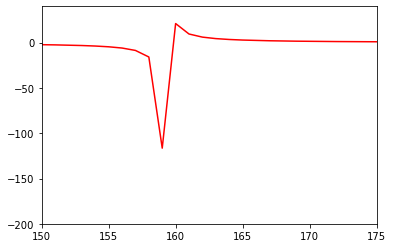

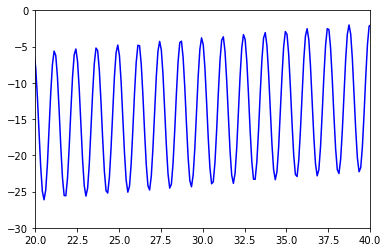

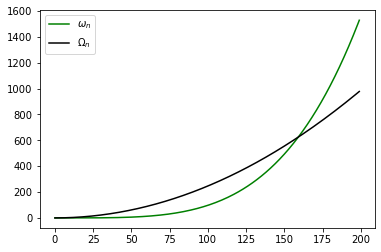

In [131]:
# Display results :

n = np.linspace(0, N-1, N)

plt.figure()
plt.plot(n, A, 'r-')

plt.axis([150, 175, -200, 40])

# -----------------------------

plt.figure()
plt.plot(x, v, 'b-')

plt.axis([20, 40, -30, 0])

# -----------------------------

plt.figure()
plt.plot(n, om_n**2, 'g-', label=r'$\omega_n$')
plt.plot(n, Om_n**2, 'k-', label=r'$\Omega_n$')

plt.legend()